<a href="https://colab.research.google.com/github/navaneethsdk/Data-Driven-Astronomy/blob/master/RedShift_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 We'll use galaxies where accurate spectroscopic redshifts have been calculated as our gold standard. 

We will be using flux magnitudes from the Sloan Digital Sky Survey (SDSS) catalogue to create colour indices. Flux magnitudes are the total flux (or light) received in five frequency bands (u, g, r, i and z).

The astronomical colour (or colour index) is the difference between the magnitudes of two filters, i.e. u - g or i - z.

This index is one way to characterise the colours of galaxies. For example, if the u-g index is high then the object is brighter in ultra violet frequencies than it is in visible green frequencies.

Colour indices act as an approximation for the spectrum of the object and are useful for classifying stars into different types.

To calculate the redshift of a distant galaxy, the most accurate method is to observe the optical emission lines and measure the shift in wavelength. However, this process can be time consuming and is thus infeasible for large samples.

For many galaxies we simply don't have spectroscopic observations.

Instead, we can calculate the redshift by measuring the flux using a number of different filters and comparing this to models of what we expect galaxies to look like at different redshifts.

In this activity, we will use machine learning to obtain photometric redshifts for a large sample of galaxies. We will use the colour indices (u-g, g-r, r-i and i-z) as our input and a subset of sources with spectroscopic redshifts as the training dataset.

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def get_features_targets(data):
  data = np.load('sdss_galaxy_colors.npy')
  features = np.zeros((data.shape[0],4))
  features[:,0] = data['u']-data['g']
  features[:,1] = data['g']-data['r']
  features[:,2] = data['r']-data['i']
  features[:,3] = data['i']-data['z']
  target = data['redshift']
  return (features,target)

def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

def validate_model(model, features, targets):
  # split the data into training and testing features and predictions
  split = features.shape[0]//2
  train_features = features[:split]
  test_features = features[split:] 
  train_targets = targets[:split]
  test_targets = targets[split:]
  # train the model
  model.fit(train_features,train_targets)
  # get the predicted_redshifts
  predictions = model.predict(test_features)
  # use median_diff function to calculate the accuracy
  return median_diff(test_targets, predictions)

In [ ]:
#naive model
# load the data and generate the features and targets
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)
  
# initialize model
dtr = DecisionTreeRegressor()
# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.021947


In [ ]:

import pydotplus as pydotplus
from sklearn.tree import export_graphviz

def get_features_targets(data):
    features = np.zeros(shape=(len(data), 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    targets = data['redshift']
    return features, targets


if __name__ == "__main__":
    data = np.load('sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # Initialize model
    dtr = DecisionTreeRegressor(max_depth=3)    # We will come to this input in the next tutorial

    # Split the data into training and testing
    split_index = int(0.5 * len(features))
    train_features = features[:split_index]
    train_targets = targets[:split_index]

    dtr.fit(train_features, train_targets)

    dot_data = export_graphviz(dtr, out_file=None,feature_names=['u - g', 'g - r', 'r - i', 'i - z'])
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_jpg("decision_tree.jpg")


The median of differences of  
≈
0.02
 . This means that half of our galaxies have a error in the prediction of  
<
0.02
 , which is pretty good. One of the reason we chose the median of differences as our accuracy measure is that it gives a fair representation of the errors especially when the distribution of errors is skewed.

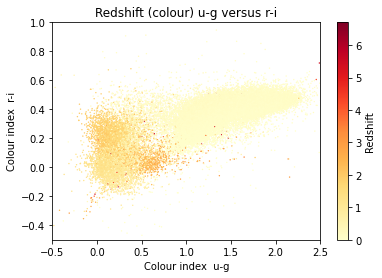

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Complete the following to make the plot
if __name__ == "__main__":
    data = np.load('sdss_galaxy_colors.npy')
    # Get a colour map
    cmap = plt.get_cmap('YlOrRd')

    # Define our colour indexes u-g and r-i
    u_g = data['u'] - data['g']
    r_i = data['r'] - data['i']
    # Make a redshift array
    redshift = data['redshift']
    # Create the plot with plt.scatter and plt.colorbar
    plot = plt.scatter(u_g, r_i, s=2, lw=0, c=redshift, cmap=cmap)
    cb = plt.colorbar(plot)
    cb.set_label('Redshift')
    # Define your axis labels and plot title
    plt.xlabel('Colour index  u-g')
    plt.ylabel('Colour index  r-i')
    plt.title('Redshift (colour) u-g versus r-i')
    # Set any axis limits
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1)
    plt.show()